## Statistical Process Control
Written by Nagdev Amruthnath

#### "The objective of a process control system is to provide a statistical signal when assignable causes of variation are present"

### Load libraries

In [1]:
# libraries
#install.packages("qcc")
library(qcc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Package 'qcc' version 2.7
Type 'citation("qcc")' for citing this R package in publications.


### Get Some Sample Data
In this tutorial, a generic data set called piston rings is used. Here, random samples piston ring's diameter is measured.   

In [2]:
#load data
data(pistonrings)
diameter = with(pistonrings, qcc.groups(diameter, sample))

#rename colmns
colnames(diameter) = c("sample1", "sample2","sample3","sample4","sample5" )

#show top data
head(diameter)

#type of data
str(diameter)

sample1,sample2,sample3,sample4,sample5
74.030,74.002,74.019,73.992,74.008
73.995,73.992,74.001,74.011,74.004
73.988,74.024,74.021,74.005,74.002
74.002,73.996,73.993,74.015,74.009
73.992,74.007,74.015,73.989,74.014
74.009,73.994,73.997,73.985,73.993


 num [1:40, 1:5] 74 74 74 74 74 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:40] "1" "2" "3" "4" ...
  ..$ : chr [1:5] "sample1" "sample2" "sample3" "sample4" ...


### X-bar Chart & R Chart

1. For variables that have continuous dimensions (Weight, speed, length, strength, etc.)
2. X-charts are to control the central tendency of the process
3. R-charts are to control the dispersion of the process
4. These two charts must be used together

#### X-bar chart


Call:
qcc(data = train, type = "xbar", newdata = test, confidence.level = conf)

xbar chart for train 

Summary of group statistics:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
73.99020 73.99820 74.00080 74.00118 74.00420 74.01020 

Group sample size:  5
Number of groups:  25
Center of group statistics:  74.00118
Standard deviation:  0.009785039 

Summary of group statistics in test:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
73.99220 74.00290 74.00720 74.00765 74.01270 74.02340 

Group sample size:  5
Number of groups:  15 

Control limits:
      LCL      UCL
 73.98678 74.01558


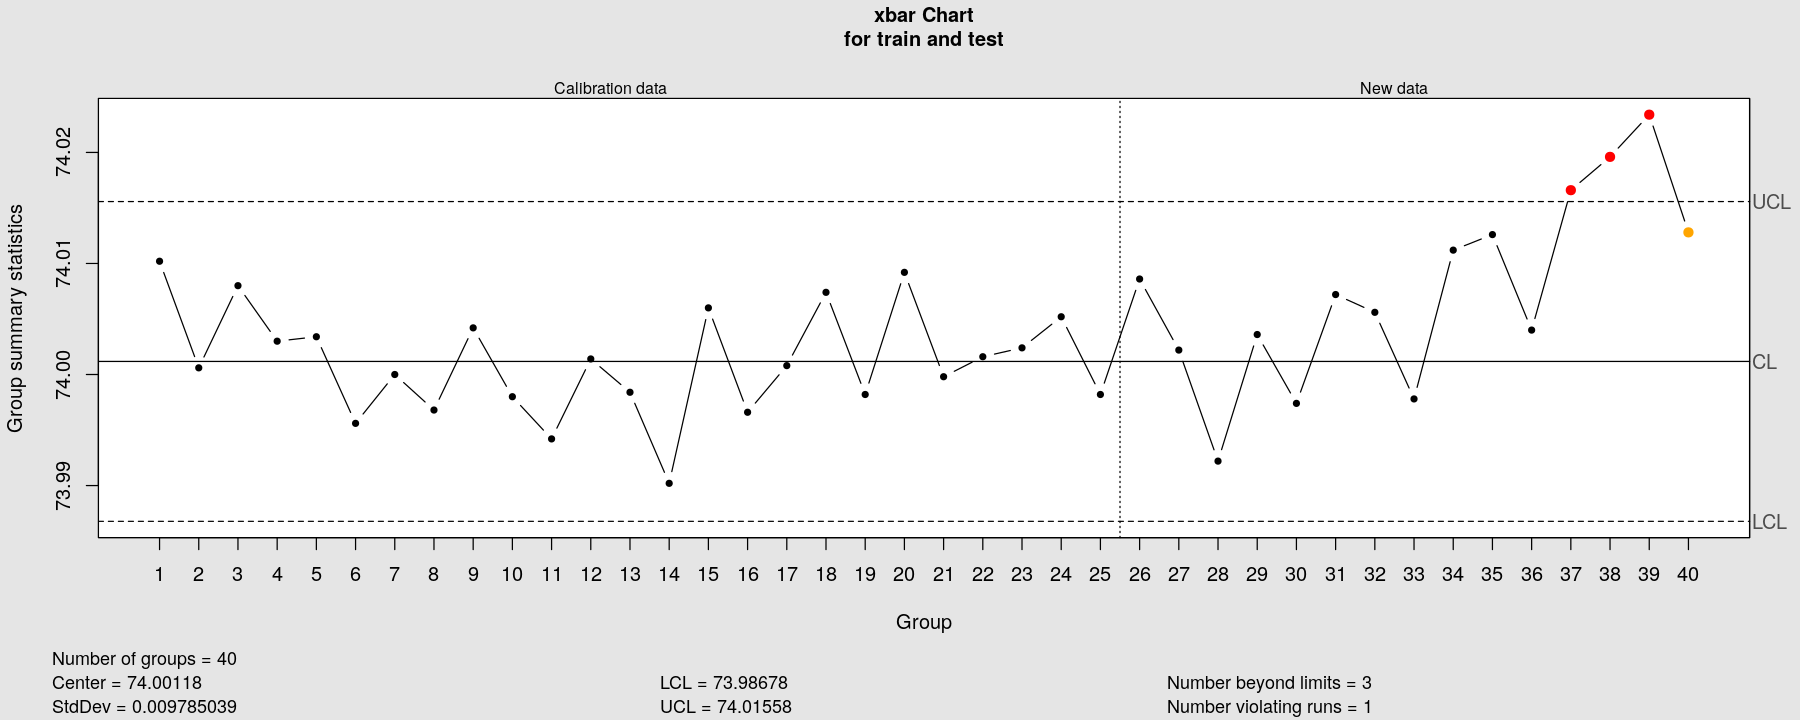

In [3]:
# set parameters
train = diameter[1:25,]
test = diameter[26:nrow(diameter),]
conf = 0.999

# Adjust plot sizes
options(repr.plot.width = 15, repr.plot.height = 6)

#Xbar chart
xBar = qcc(train,
           type="xbar",
           newdata = test,
           confidence.level=conf           
          )
#smmary of analysis
summary(xBar)

In the above x-bar chart, we can notice that from the train data lower control (LCL) and upper control limits (UCL) are generated. LCL = 73.98 and UCL = 74.01. We also know that center is 74.001. From the test data, there were total of 3 samples that were out of control. 

### R-Chart

R-charts are used to detect any variation in the samples.


Call:
qcc(data = train, type = "R", newdata = test, confidence.level = conf)

R chart for train 

Summary of group statistics:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00800 0.01800 0.02100 0.02276 0.02600 0.03900 

Group sample size:  5
Number of groups:  25
Center of group statistics:  0.02276
Standard deviation:  0.009785039 

Summary of group statistics in test:
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
0.01400000 0.01900000 0.02500000 0.02453333 0.02750000 0.04400000 

Group sample size:  5
Number of groups:  15 

Control limits:
         LCL        UCL
 0.003015968 0.05598777


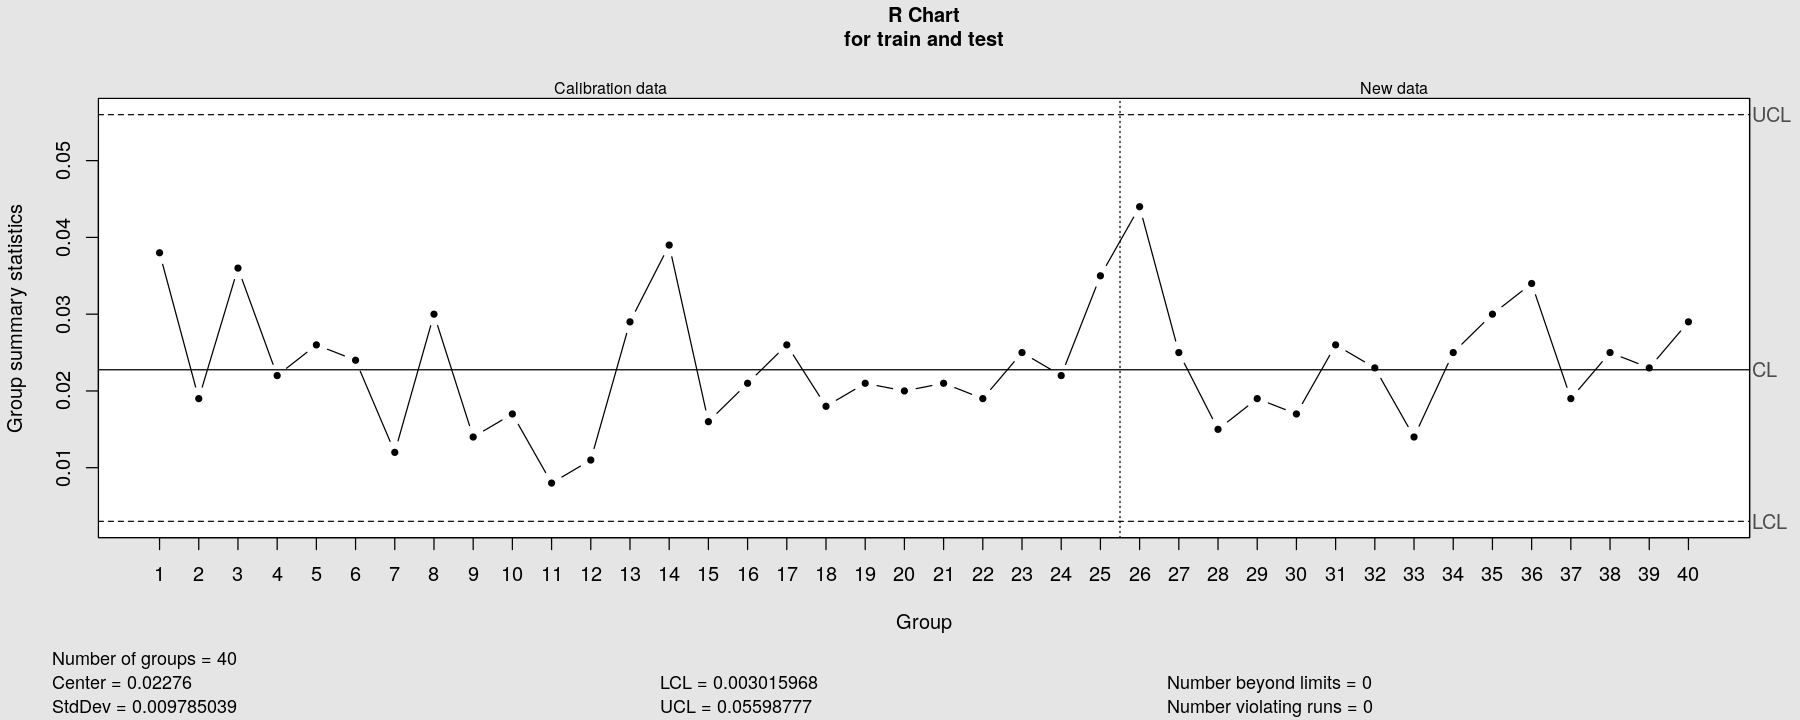

In [4]:
# Adjust plot sizes
options(repr.plot.width = 15, repr.plot.height = 6)

#Xbar chart
Rchart = qcc(train,
           type="R",
           newdata = test,
           confidence.level=conf           
          )

#smmary of analysis
summary(Rchart)

## P-charts & C-Charts
1. For variables that are categorical 
2. Good/bad, yes/no, acceptable/unacceptable
3. Measurement is typically counting defectives
4. Charts may measure
5. Percent defective (p-chart)
6. Number of defects (c-chart)

For this tutorial, we will be using Orange Juice data

### P-charts

Population will be a binomial distribution, but applying the Central Limit Theorem allows us to assume a normal distribution for the sample statistics



In [5]:
#load data
data(orangejuice)

#summary of data
str(orangejuice)
head(orangejuice)


'data.frame':	54 obs. of  4 variables:
 $ sample: int  1 2 3 4 5 6 7 8 9 10 ...
 $ D     : int  12 15 8 10 4 7 16 9 14 10 ...
 $ size  : int  50 50 50 50 50 50 50 50 50 50 ...
 $ trial : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


sample,D,size,trial
1,12,50,TRUE
2,15,50,TRUE
3,8,50,TRUE
4,10,50,TRUE
5,4,50,TRUE
6,7,50,TRUE


where, 
sample = sample id  
D = number of defectives  
size = sample sizes  
trial = trial samples (TRUE/FALSE)  


Call:
qcc(data = D[trial], type = "p", sizes = size[trial])

p chart for D[trial] 

Summary of group statistics:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0800000 0.1600000 0.2100000 0.2313333 0.2950000 0.4800000 

Group sample size:  50
Number of groups:  30
Center of group statistics:  0.2313333
Standard deviation:  0.421685 

Control limits:
           LCL       UCL
    0.05242755 0.4102391
    0.05242755 0.4102391
...                     
    0.05242755 0.4102391


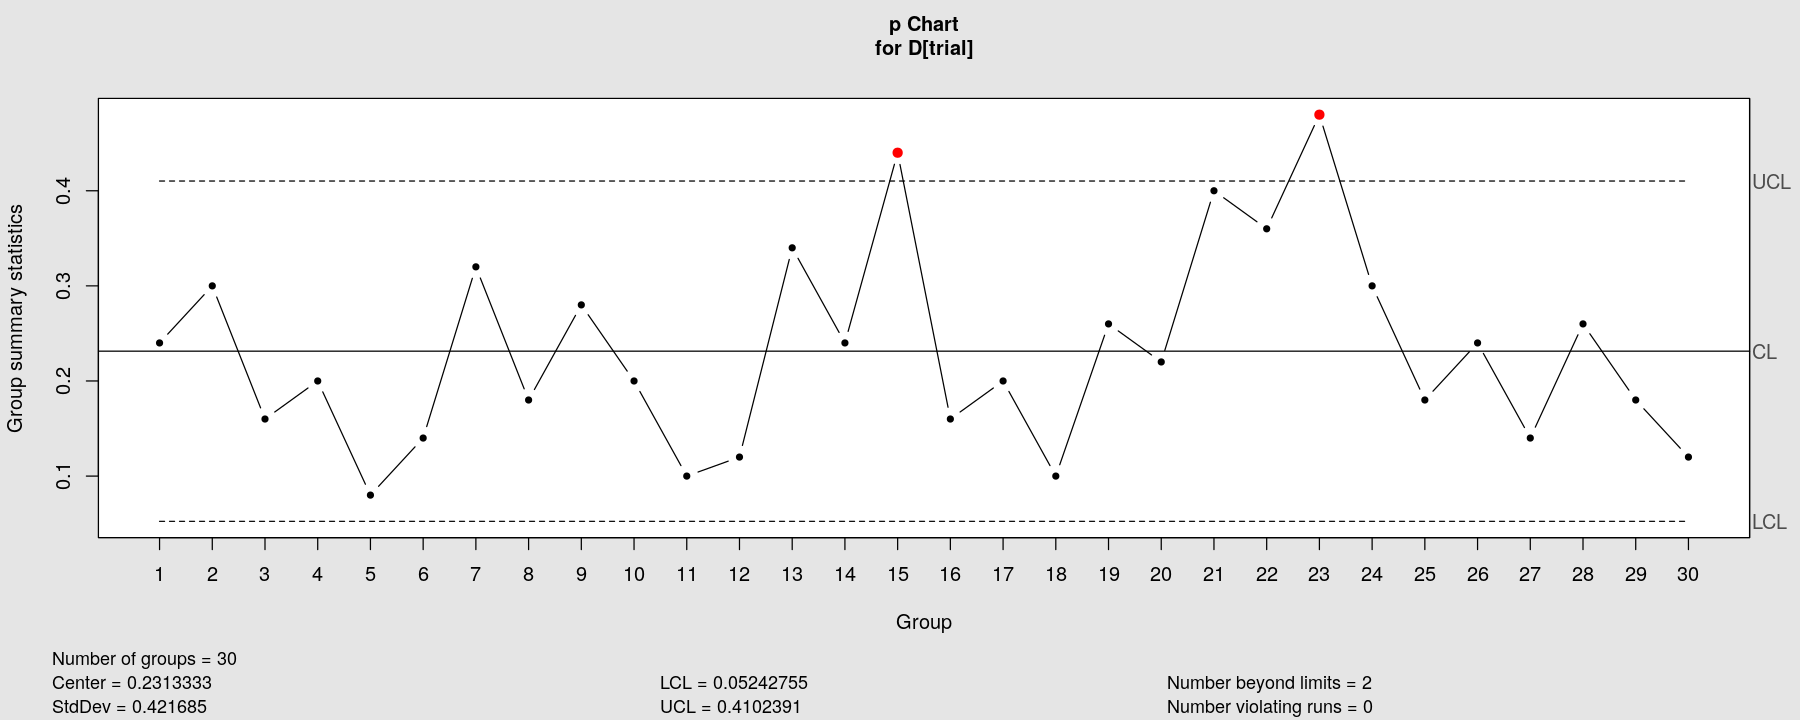

In [6]:
#p-chart
q1 = with(orangejuice, 
          qcc(D[trial], 
              sizes=size[trial], 
              type="p"))

#summary of chart
summary(q1)

### C-Charts
C-Chart tells us the number of defectives. Population will be a Poisson distribution, but applying the Central Limit Theorem allows us to assume a normal distribution for the sample statistics


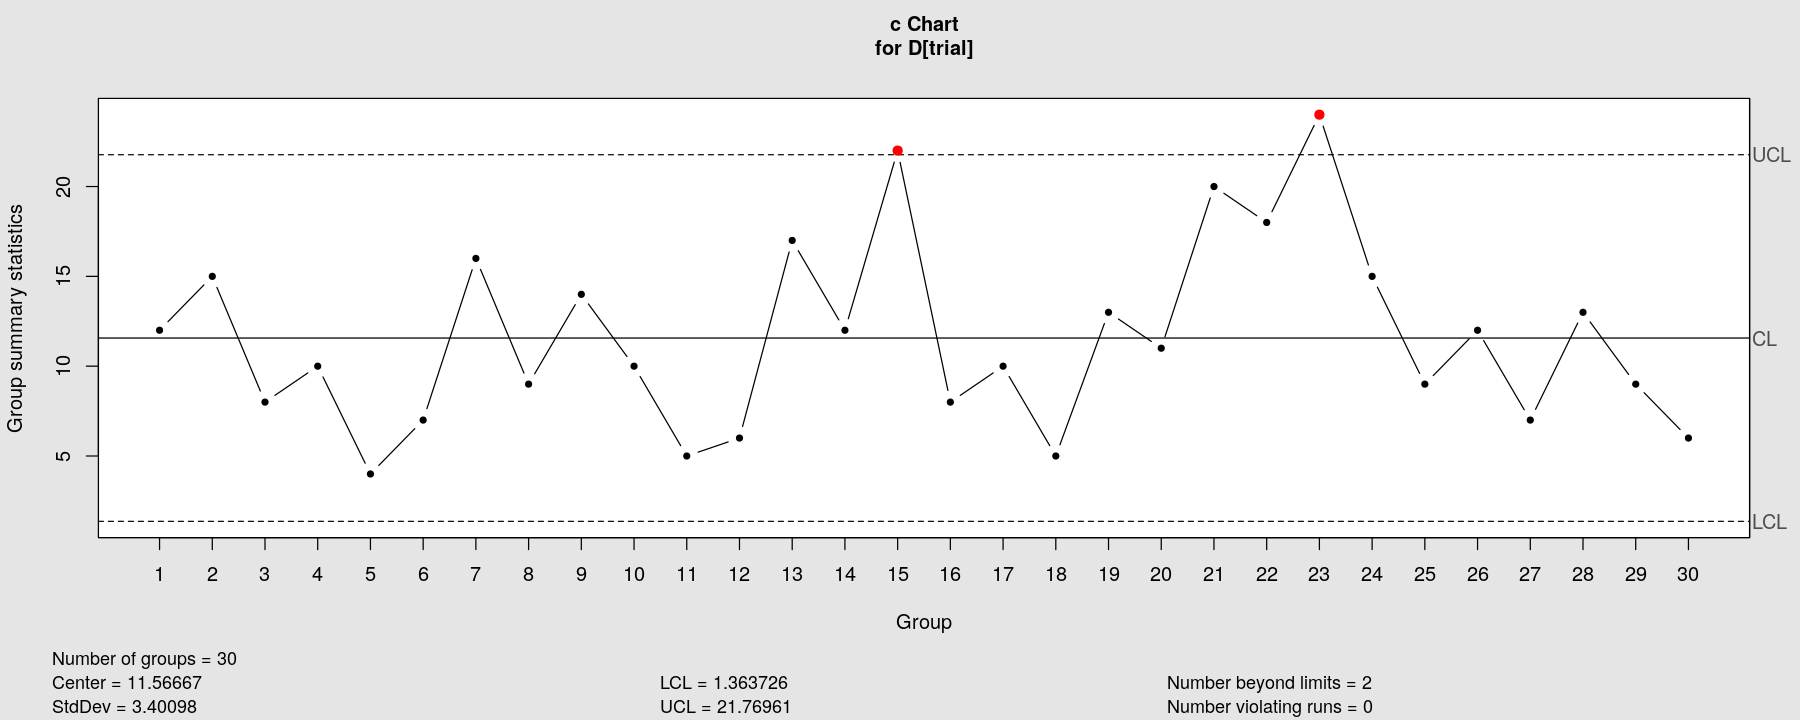

In [7]:
q1 = with(orangejuice, 
          qcc(D[trial], sizes=size[trial], type="c"))


#### References
[1] Montgomery, D.C. (1991) Introduction to Statistical Quality Control, 2nd ed, New York, John Wiley & Sons, pp. 152–155.  
[2] Scrucca, L. (2004) qcc: an R package for quality control charting and statistical process control. R News 4/1, 11-17.
